In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn import feature_selection
from wordcloud import WordCloud
from bidi.algorithm import get_display
import arabic_reshaper

from persian_wordcloud.wordcloud import PersianWordCloud
from sklearn.ensemble  import RandomForestClassifier

# Measuring Literature project

In [3]:
df = pd.read_excel("data/poems_reduced.xlsx", names=["Poet", "Poem", "Hemistich", "Verse","Text"], index_col=0)
df.index.name="Index"
df.Text = df.Text.str.strip()
df.head(10)

,Poet,Poem,Hemistich,Verse,Text
Index,,,,,
1,1,1,1,1,الا یا ایها الساقی ادر کاسا و ناولها
2,1,1,2,1,که عشق آسان نمود اول ولی افتاد مشکل‌ها
3,1,1,3,2,به بوی نافه‌ای کاخر صبا زان طره بگشاید
4,1,1,4,2,ز تاب جعد مشکینش چه خون افتاد در دل‌ها
5,1,1,5,3,مرا در منزل جانان چه امن عیش چون هر دم
6,1,1,6,3,جرس فریاد می‌دارد که بربندید محمل‌ها
7,1,1,7,4,به می سجاده رنگین کن گرت پیر مغان گوید
8,1,1,8,4,که سالک بی‌خبر نبود ز راه و رسم منزل‌ها
9,1,1,9,5,شب تاریک و بیم موج و گردابی چنین هایل


In [24]:
#Delete rows
df = df[df['Poem'] <= 500]

In [53]:
#export new dataset
df.to_csv("data/output/reduced_dataset.csv", encoding="utf-8")

## Mapping the poets' id to names

In [25]:
#FULL DATASET
#poet={1:"Hafez", 2:"Saadi", 3:"Molavi", 4:"Attar", 5:"Sanaee", 6:"Vahshi", 7:"Khaghani", 8:"Anvari", 9:"Ouhadi", 10:"Khajoo",
#      11:"Eraghi",12:"Razi", 13:"Hatef", 14:"Saeb Tabrizi", 15:"Kashani", 16:"Amir Khosro", 17:"Rahi",  18:"Shahriar",
#      19:"Shah Nematollah", 20:"Seyf Farghani", 21:"Salman", 22:"Ghaani", 23:"Orfi", 24:"Obeyd", 25:"Helali",
#      26:"Forooghi", 27:"Feyz", 28:"Bidel"}

In [26]:
#REDUCED DATASET
poet={1:"Hafez", 2:"Saadi", 3:"Molavi", 4:"Attar", 5:"Sanaee", 6:"Vahshi", 7:"Khaghani", 8:"Anvari", 9:"Ouhadi", 10:"Khajoo",
      11:"Eraghi", 12:"Kashani", 13:"Amir Khosro", 14:"Shah Nematollah", 15:"Salman", 16:"Orfi", 17:"Forooghi",
      18:"Feyz", 19:"Bidel"}

# Exploratory analysis

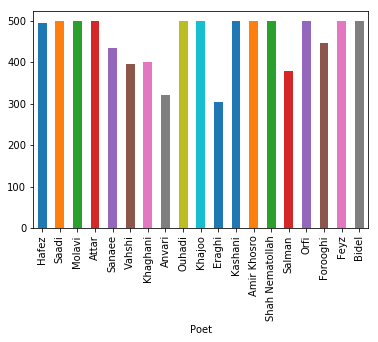

In [27]:
#Distribution of poems by poet
df_count_hemi = df[["Poet"]].groupby("Poet").size()
ax = df_count_hemi.plot("bar")
ax.set_xticklabels(list(poet.values()));

In [28]:
#length of hemistichs over the whole corpus
df.Text.apply(lambda x : len(x)).describe()

count    8679.000000
mean      536.179744
std       214.489136
min        39.000000
25%       397.000000
50%       514.000000
75%       651.000000
max      3406.000000
Name: Text, dtype: float64

C:\Users\Mathieu\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


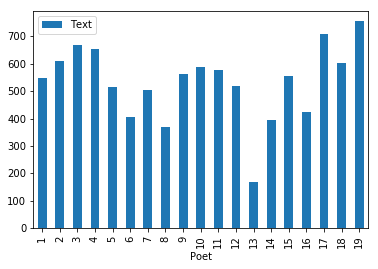

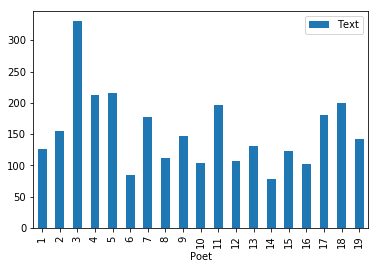

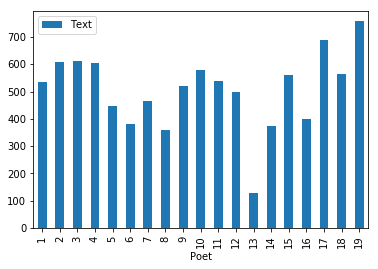

In [29]:
#length of hemistichs per author
length_per_author = df[["Poet","Text"]]
length_per_author.Text = length_per_author.Text.apply(lambda x : len(x))
length_per_author.groupby("Poet").mean().plot(kind="bar")
length_per_author.groupby("Poet").std().plot(kind="bar")
length_per_author.sort_values(["Text"],ascending=True).groupby("Poet").median().plot(kind="bar")

## Classification

In [30]:
# Use a subet
df_subset = df.sample(int(5*df.index.size/100))
df_copy = df.copy()

In [31]:
#df = df_subset
df = df_copy

In [32]:
#Group by poem
df = df.groupby(["Poet","Poem"])['Text'].apply(' '.join).reset_index()

In [33]:
#Group by verse
#df = df.groupby(["Poet","Poem","Verse"])['Text'].apply(' '.join).reset_index()

In [34]:
df_x = df.Text
df_y = df.Poet

In [35]:
with open("data\pen-names.txt", 'r',  encoding='utf-8') as f:
    stopwords_poets = [line.strip() for line in f]

In [36]:
#stopwords_poets

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(stop_words=stopwords_poets)
df_x_counts = count_vect.fit_transform(df_x)
tfidf_transformer = TfidfTransformer()
df_x_tfidf = tfidf_transformer.fit_transform(df_x_counts)

In [56]:
feature_names = count_vect.get_feature_names()

In [39]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x_tfidf, df_y, test_size=.2, random_state = 0)

### Multinomial Naive Bayes classifier

In [49]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(df_x_train_new, df_y_train)

In [89]:
print(clf.score(df_x_test_new, df_y_test))

0.614055299539


In [ ]:
chi2(X, y)

### Random Forest

In [42]:
#Weights
weights = dict()
for i in range(1,20) :
    weights[i] = df.loc[df.Poet == i].index.size/df.index.size

In [48]:
# TRAIN RANDOM FOREST

# Train model
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=100,max_depth=225, class_weight=weights)
rand_forest_model.fit(df_x_train_new,df_y_train)

# Predict
y_pred = rand_forest_model.predict(df_x_test_new)
y_pred_train = rand_forest_model.predict(df_x_train_new)

# Compute accuracy on training set
accuracy_rand_forest_training = sk.metrics.accuracy_score(df_y_train,y_pred_train)
print("Training accuracy score on training set")
print(accuracy_rand_forest_training)
print("Training precision score")
print(sk.metrics.precision_score(df_y_train,y_pred_train, average='micro'))

# Compute accuracy on test set
accuracy_rand_forest = sk.metrics.accuracy_score(df_y_test,y_pred)
print("Test accuracy score")
print(accuracy_rand_forest)
print("Test precision score")
print(sk.metrics.precision_score(df_y_test,y_pred, average='micro'))

#Confusion matrix
print("Confusion matrix saved")
pd.DataFrame(sk.metrics.confusion_matrix(df_y_test,y_pred)).to_csv("data\output\confusion_matrix.csv")
#print(cfm)

Training accuracy score on training set
1.0
Training precision score
1.0
Test accuracy score
0.588133640553
Test precision score
0.588133640553
Confusion matrix saved


In [74]:
max_depth_choices = [80, 100, 125, 150, 175, 200, 225, 250]
rf_scores = []
rf_param = []

#Loop for hyperparameter depth
for max_depth_choices_idx, max_depth_choices_value in enumerate(max_depth_choices):
    
    print('max_depth_choices_idx: ',max_depth_choices_idx+1,'/',len(max_depth_choices),', value: ',max_depth_choices_value)

    # Random forest
    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=100, max_depth=max_depth_choices_value,class_weight=weights)

    #Scores
    scores = sk.model_selection.cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())
    rf_param.append(max_depth_choices_value)
    print('Accuracy = ', scores.mean())


max_depth_choices_idx:  1 / 8 , value:  80
Accuracy =  0.447711075882
max_depth_choices_idx:  2 / 8 , value:  100


KeyboardInterrupt: 

best accuracy:
0.760882887482
best parameter:
250


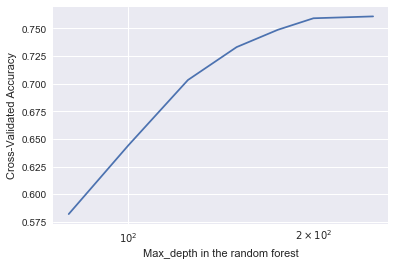

In [259]:
plt.semilogx(rf_param,rf_scores)
plt.xlabel('Max_depth in the random forest')
plt.ylabel('Cross-Validated Accuracy')

idx_best = np.argmax(rf_scores)
idx_worst = np.argmin(rf_scores)

print('best accuracy:')
print(np.max(rf_scores))
print('best parameter:')
best_param_depth = rf_param[idx_best]
worst_param_depth = rf_param[idx_worst]
print(best_param_depth)

In [51]:
importances = rand_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
important_indices=list()
important_features=list()

for f in range(460):
    #print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
    important_indices.append(importances[indices[f]])
    important_features.append(feature_names[indices[f]])
  
    
pd.DataFrame({"feature" : important_features, "importance" :important_indices}).head(20)
# Plot the feature importances of the forest
#plt.figure()
#plt.title("Feature importances")
#plt.bar(range(df_x_train.shape[1]), importances[indices],
#       color="r", yerr=std[indices], align="center")
#plt.xticks(range(1000), indices)
#plt.xlim([-1, 1000])
#plt.show()

,feature,importance
0,به,0.022185
1,که,0.014223
2,است,0.012848
3,در,0.011488
4,از,0.011054
5,ما,0.009935
6,تو,0.009743
7,بر,0.009015
8,را,0.008946
9,من,0.008563


In [45]:
# Select features
select_features = sk.feature_selection.SelectFromModel(rand_forest_model,threshold=0.000152 , prefit=True)
df_x_train_new = select_features.transform(df_x_train)
df_x_test_new = select_features.transform(df_x_test)

In [46]:
len(select_features.get_support())
feature_names = [feature_names[x] for x in select_features.get_support(indices=True) if x]

In [52]:
print(sk.metrics.classification_report(df_y_test, y_pred, target_names=list(poet.values())))

                 precision    recall  f1-score   support

          Hafez       0.54      0.49      0.51       107
          Saadi       0.46      0.66      0.54        96
         Molavi       0.60      0.70      0.65        91
          Attar       0.62      0.78      0.69       104
         Sanaee       0.47      0.38      0.42        85
         Vahshi       0.67      0.39      0.50        84
       Khaghani       0.46      0.23      0.31        83
         Anvari       0.43      0.16      0.24        55
         Ouhadi       0.47      0.40      0.43       107
         Khajoo       0.65      0.76      0.70       106
         Eraghi       0.33      0.04      0.07        53
        Kashani       0.55      0.52      0.53        99
    Amir Khosro       0.55      0.85      0.67        96
Shah Nematollah       0.71      0.92      0.80       116
         Salman       0.64      0.24      0.35        67
           Orfi       0.54      0.56      0.55       110
       Forooghi       0.83    

In [318]:
df_x_tfidf

<17905x68479 sparse matrix of type '<class 'numpy.float64'>'
	with 1155381 stored elements in Compressed Sparse Row format>

## Feature extraction for each poets

In [107]:
import sklearn.feature_extraction.text


class TextFeature(object):
    '''
    This class is to create feature matrix
    '''

    def __init__(self, corpus, analyzer='word', ngram=(1, 1), idf=False, norm=None, binary=False):
        tfm = sklearn.feature_extraction.text.TfidfVectorizer(use_idf=idf, analyzer=analyzer, tokenizer=str.split,
                                                              ngram_range=ngram, norm=norm,
                                                              stop_words=stopwords_poets, lowercase=False, binary=binary)
        self.tf_vec = tfm.fit_transform(corpus)
        self.feature_names = tfm.get_feature_names()

In [209]:
def poet_feature_extractor(df_x, df_y, column_label=1):
    '''
     Extract features based on label column
     :param column_label:
     :return:
     '''
    select_poet=dict()
    for i in range(1,20) :
        if i == column_label :
            select_poet[i] = 1
        else :
            select_poet[i] = 0
            
 
    df_y = df_y.map(select_poet)
    weights = {0 : (100*df_y.value_counts()[0]/df_y.size) , 1 : (100*df_y.value_counts()[1]/df_y.size)}
        
    feature_extractor = TextFeature(df_x)

    x = feature_extractor.tf_vec
    y = df_y

    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=100,max_depth=225, class_weight=weights)
    rand_forest_model.fit(x,y)
    
    # Select features
    #select_features = sk.feature_selection.SelectFromModel(rand_forest_model,threshold=0.000200 , prefit=True)
    #x_new = select_features.transform(x)
    #rand_forest_model.fit(x_new,y)
    #feature_names = [feature_extractor.feature_names[i] for i in select_features.get_support(indices=True) if i]
    
    #with open("data/output/features_importance_label_column_" + str(column_label) + ".csv", "w") as output:
    #    COLUMN_FEATURE = 'feature'
    #    COLUMN_IMPORTANCE = 'importance'
    #    fieldnames = [COLUMN_FEATURE, COLUMN_IMPORTANCE]
    #    writer = csv.DictWriter(output, fieldnames=fieldnames)

    #    writer.writeheader()
    #    for i in range(0, 500):
    #        writer.writerow({COLUMN_FEATURE: feature_extractor.feature_names[i].encode('utf-8'),
    #                         COLUMN_IMPORTANCE: rand_forest_model.feature_importances_[i]})

    importances = rand_forest_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    important_indices=list()
    features=list()
    importance=list()
    
## For wordcloud (needs dict)
    #tuples = dict()
    #for f in range(500):
        #print("%d. feature %s (%f)" % (f + 1, feature_extractor.feature_names[indices[f]], importances[indices[f]]))
        #features.append(feature_extractor.feature_names[indices[f]])
        #importance.append(importances[indices[f]])
        #tuples[get_display(arabic_reshaper.reshape((feature_extractor.feature_names[indices[f]])))] = importances[indices[f]]## 

## For csv        
    for f in range(500):
        #print("%d. feature %s (%f)" % (f + 1, feature_extractor.feature_names[indices[f]], importances[indices[f]]))
        features.append(feature_extractor.feature_names[indices[f]])
        importance.append(importances[indices[f]])
        
    #return pd.DataFrame({"poet" : column_label, "feature" : features, "importance" : importance})
#    pd.DataFrame({"poet" : column_label, "feature" : features, "importance" : importance}).to_csv("data/output/total_extracted_features"+str(column_label)+".csv", encoding="utf-8")   

In [210]:
#hafez = poet_feature_extractor(df.Text, df_y, 1)
total_features = pd.DataFrame(["poet", "feature", "importance"])
for i in range (1, 20) :
    poet_feature_extractor(df.Text, df_y, i)
                         
#bidel = poet_feature_extractor(df.Text, df_y, 28)
#poet_features = pd.DataFrame()
#for i in range (1,29) :
#    poet_features[i] = poet_feature_extractor(df.Text, df_y, i)

In [16]:

#total_features = total_features[["feature", "importance", "poet"]]
#total_features = total_features.iloc[3:]
total_features = total_features[['poet', 'feature', 'importance']]
total_features.to_csv("data/output/total_extracted_features.csv_nostopwords", encoding="utf-8")

### Word clouds

In [573]:
all_text = " "
for row in df.Text :
    all_text = all_text + row
#for word in list(all_text):
#    if word in stopwords_fa:
#        all_text.replace(word, '')

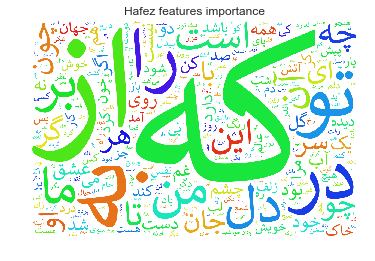

In [574]:

wc = WordCloud(background_color="white", max_words=300, mask=None, stopwords=None, margin=10, width = 1200, height = 800,
               random_state=1, font_path= "C:\Windows\Fonts\calibri.ttf").generate(get_display(arabic_reshaper.reshape(all_text)))

def display_cloud(wc) :
    default_colors = wc.to_array()
    plt.figure()
    plt.title("Hafez features importance")
    plt.imshow(default_colors)
    plt.axis("off")
    plt.show()
    return

display_cloud(wc)
image = wc.to_image()
image.save('bidel.png')

In [570]:
stopwords_fa

['!',
 ',',
 '.',
 ':',
 ';',
 '،',
 '؛',
 '؟',
 'بیدل',
 'شمس',
 'سعدیا',
 'سعدیست',
 'سید',
 'فیض',
 'حافظ',
 'حافظا',
 'تبریز',
 'خواجو',
 'اوحدی',
 'عطار',
 'سعدی',
 'تبریزی',
 'آباد',
 'رهی',
 'آ',
 'عراقی ره',
 'قاآنی',
 'آری',
 'ز',
 'عراقی،',
 'قاآنیم',
 'قاآنیا',
 'آمد',
 'ز',
 'گر',
 'آمده',
 'آن',
 'آنان',
 'آنجا',
 'آنطور',
 'آنقدر',
 'آنكه',
 'آنها',
 'آنچه',
 'آنکه',
 'آورد',
 'آورده',
 'آيد',
 'آی',
 'آیا',
 'آیند',
 'اتفاقا',
 'اثرِ',
 'احتراما',
 'احتمالا',
 'اخیر',
 'اری',
 'از',
 'ازجمله',
 'اساسا',
 'است',
 'استفاد',
 'استفاده',
 'اش',
 'اشکارا',
 'اصلا',
 'اصولا',
 'اعلام',
 'اغلب',
 'اكنون',
 'الان',
 'البته',
 'البتّه',
 'ام',
 'اما',
 'امروز',
 'امروزه',
 'امسال',
 'امشب',
 'امور',
 'ان',
 'انجام',
 'اند',
 'انشاالله',
 'انصافا',
 'انطور',
 'انقدر',
 'انها',
 'انچنان',
 'انکه',
 'انگار',
 'او',
 'اول',
 'اولا',
 'اي',
 'ايشان',
 'ايم',
 'اين',
 'اينكه',
 'اکثرا',
 'اکنون',
 'اگر',
 'ای',
 'ایا',
 'اید',
 'ایشان',
 'ایم',
 'این',
 'اینجا',
 'ایند',
 'اینطور',
 'ا

## Exploring poetic concepts
eshgh "عشق"

In [ ]:
##Load extracted features


In [ ]:
##Function 1 : display ranking order of the feature

In [ ]:
##Function 2 : build co-occurence. Hemistich / beit / do beit / poem ?

In [ ]:
##Draw network

# Chi2 Analysis

In [102]:
#chi2=  Chi2Analysis(df_x_tfidf, df_y, feature_names)
#chi2, pval = sk.feature_selection.chi2(df_x_tfidf, df_y)

chi2test = pd.DataFrame([chi2, pval])#
chi2test.columns = feature_names
chi2test.to_csv("data/output/chi2full.csv", encoding="utf-8")

In [105]:
def poet_chi2(df_x, df_y, column_label=1):
    '''
     Extract features based on label column
     :param column_label:
     :return:
     '''
    select_poet=dict()
    for i in range(1,20) :
        if i == column_label :
            select_poet[i] = 1
        else :
            select_poet[i] = 0
            
 
    df_y = df_y.map(select_poet)
    feature_extractor = TextFeature(df_x)

    x = feature_extractor.tf_vec
    y = df_y

    chi2, pval = sk.feature_selection.chi2(x, y)
    chi2test = pd.DataFrame([chi2, pval])
    chi2test.columns = feature_extractor.feature_names
    chi2test.to_csv("data/output/chi2"+str(column_label)+".csv", encoding="utf-8")

In [108]:
#Hafez
poet_chi2(df_x, df_y, 1)

In [109]:
#Saadi
poet_chi2(df_x, df_y, 2)

In [110]:
#Attar
poet_chi2(df_x, df_y, 4)

In [111]:
#Bidel
poet_chi2(df_x, df_y, 19)

# FDR 

In [112]:

def poet_fdr(df_x, df_y, column_label=1):
    '''
     Extract features based on label column
     :param column_label:
     :return:
     '''
    select_poet=dict()
    for i in range(1,20) :
        if i == column_label :
            select_poet[i] = 1
        else :
            select_poet[i] = 0
            
 
    df_y = df_y.map(select_poet)
    feature_extractor = TextFeature(df_x)

    x = feature_extractor.tf_vec
    y = df_y

    scores, pval = sklearn.feature_selection.SelectFdr(sk.feature_selection.chi2(x, y))
    fdrTest = pd.DataFrame([chi2, pval])
    fdrTest.columns = feature_extractor.feature_names
    fdrTest.to_csv("data/output/fdr"+str(column_label)+".csv", encoding="utf-8")

In [ ]:
#Hafez
poet_fdr(df_x, df_y, 1)

In [ ]:
#Saadi
poet_fdr(df_x, df_y, 2)

In [ ]:
#Attar
poet_fdr(df_x, df_y, 4)

In [113]:
#Bidel
poet_fdr(df_x, df_y, 19)

TypeError: 'SelectFdr' object is not iterable

# Heatmap of confusion mat

In [63]:
cfm = pd.read_csv("data\output\confusion_matrix.csv", index_col=0)

In [86]:
cfm_normalized = cfm.div(cfm.sum(axis=1), axis=0)

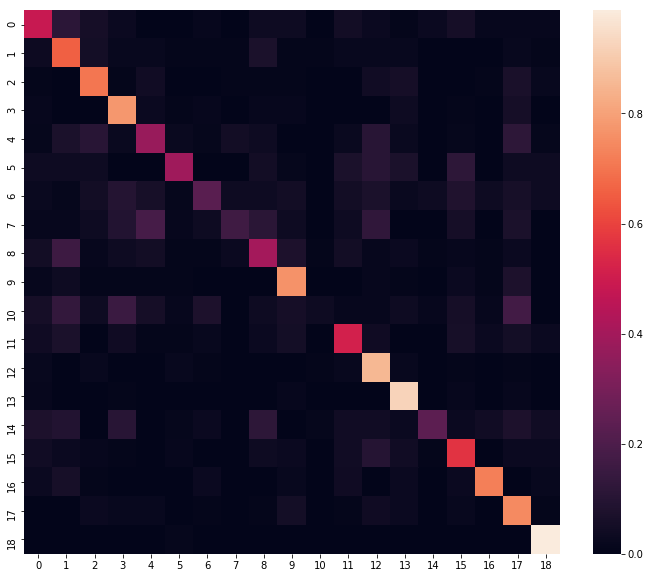

In [87]:
fig, ax = plt.subplots(figsize=(12,10)) 
plot = sns.heatmap(cfm_normalized, ax=ax)

# Features in common

In [133]:
hafez = pd.read_csv("data\output\hafez.csv", encoding="utf-8")
saadi = pd.read_csv("data\output\saadi.csv", encoding="utf-8")
bidel = pd.read_csv("data\output\sbidel.csv", encoding="utf-8")

In [134]:
common12 = pd.merge(hafez, saadi, how='inner', on=['feature'])
common13 = pd.merge(hafez, bidel, how='inner', on=['feature'])
common23 = pd.merge(saadi, bidel, how='inner', on=['feature'])

In [139]:
common13

,Unnamed: 0_x,poet_x,feature,importance_x,Unnamed: 0_y,poet_y,importance_y
0,17,1,و,0.001531,409,19,0.000370
1,20,1,ز,0.001486,342,19,0.000435
2,23,1,را,0.001334,133,19,0.000923
3,24,1,به,0.001318,361,19,0.000414
4,26,1,در,0.001267,381,19,0.000393
5,32,1,این,0.001218,142,19,0.000872
6,44,1,از,0.001062,327,19,0.000460
7,48,1,که,0.001014,76,19,0.001446
8,63,1,چون,0.000950,325,19,0.000463
9,69,1,با,0.000927,489,19,0.000322


In [127]:
hafez_unique = hafez[hafez.feature not in common.feature]
saadi_unique = saadi[saadi.feature not in common.feature]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [142]:
def feat_occurence(df, column_label=1, feature):
    '''
     Extract features based on label column
     :param column_label:
     :return:
     '''

    df_copy = df[df['Poet'] == column_label].Text

    feature_extractor = TextFeature(df)
    x = feature_extractor.tf_vec
    

    return x

SyntaxError: non-default argument follows default argument (<ipython-input-142-bec6c4bcb8ce>, line 1)

In [ ]:
df_testest = df[df['Poet'] == 1].Text

feature_extractor = TextFeature(df_testest)
x = feature_extractor.tf_vec

feature_index = x[:,:].nonzero()[1]
tfidf_scores = zip(feature_index, [x[:, a] for a in feature_index])

for w, s in [("به", s) for (i, s) in tfidf_scores]:
    print (w, s)

In [157]:
w

'بزمش'

In [148]:
df[df['Poet'] == 1].Text

0      الا یا ایها الساقی ادر کاسا و ناولها که عشق آس...
1      صلاح کار کجا و من خراب کجا ببین تفاوت ره کز کج...
2      اگر آن ترک شیرازی به دست آرد دل ما را به خال ه...
3      صبا به لطف بگو آن غزال رعنا را که سر به کوه و ...
4      دل می‌رود ز دستم صاحب دلان خدا را دردا که راز ...
5      به ملازمان سلطان که رساند این دعا را که به شکر...
6      صوفی بیا که آینه صافیست جام را تا بنگری صفای م...
7      ساقیا برخیز و درده جام را خاک بر سر کن غم ایام...
8      رونق عهد شباب است دگر بستان را می‌رسد مژده گل ...
9      دوش از مسجد سوی میخانه آمد پیر ما چیست یاران ط...
10     ساقی به نور باده برافروز جام ما مطرب بگو که کا...
11     ای فروغ ماه حسن از روی رخشان شما آب روی خوبی ا...
12     می‌دمد صبح و کله بست سحاب الصبوح الصبوح یا اصح...
13     گفتم ای سلطان خوبان رحم کن بر این غریب گفت در ...
14     ای شاهد قدسی که کشد بند نقابت و ای مرغ بهشتی ک...
15     خمی که ابروی شوخ تو در کمان انداخت به قصد جان ...
16     سینه از آتش دل در غم جانانه بسوخت آتشی بود در ...
17     ساقیا آمدن عید مبارک باد

In [ ]:
df